<a href="https://colab.research.google.com/github/oceanumeric/ESL/blob/main/ch2/Ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 Overview of Supervised Learning

Like the title indicates, this chapter gives the overview of supervised learning:


* Variable Types and Terminology
* Two Simple Approaches to Prediction
    * Least Squares
    * Nearest Neighbors 
* Statistical Decision Theory
* Local Methods in High Dimensions
* Statistical Models, Supervised Learning and Function Approximation
* Structured Regression Models
* Classes of Restricted Estimators
* Model Selection and the Bias–Variance Tradeoff

The goal of supervised learning is to predict $Y$ given $X$, where $X$ is called
input and $Y$ is called output. One should be aware of variable types:

* continuous variable
* discrete variable
    * categorical
    * ordered categorical 


In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='white')
from ch2_osl import OverviewSL
%load_ext autoreload
%autoreload 2

## Two Simple Approaches to Prediction

All examples will be given in a __classification__ context. 

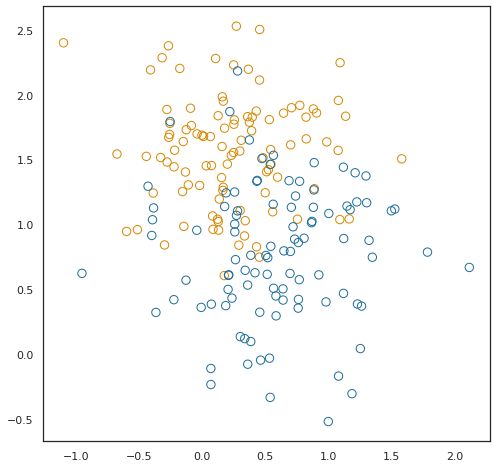

In [15]:
osl = OverviewSL()
osl.plot_data()

The estimated coefficents are [ 0.00959921 -0.20271151  0.48865941]


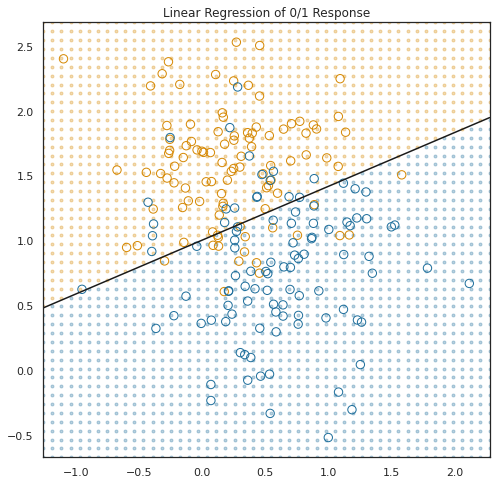

In [16]:
osl.fit_with_linear_model()
osl.plot_linear_model()

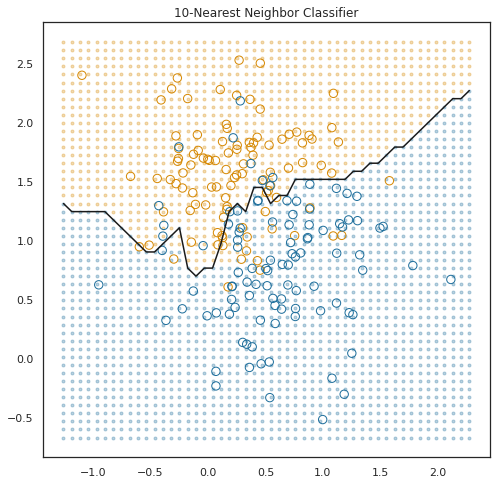

In [82]:
osl.fit_with_nearest_neighbors(k=10, boundary_line=True)

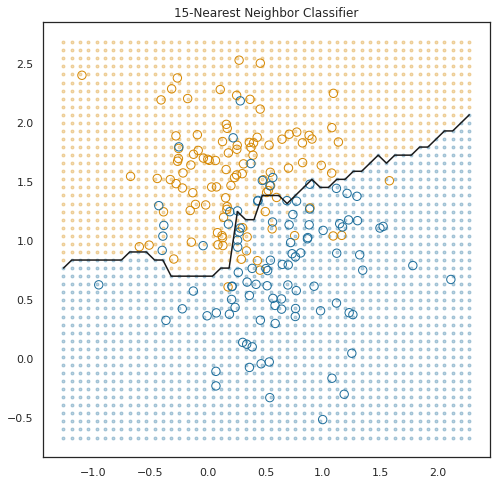

In [84]:
osl.fit_with_nearest_neighbors(k=15, boundary_line=True)

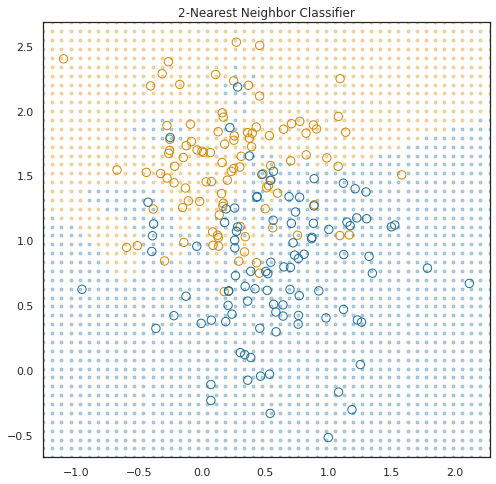

In [83]:
osl.fit_with_nearest_neighbors(k=2)

## From Least Squares to Nearest Neighbors

The linear decision boundary from least squares is very smooth, and apparently
stable to fit. It does appear to rely heavily on the assumption that a 
linear decision boundary is appropriate. In language we will develop shortly, 
it has __low variance and potentially high bias__.

On the other hand, the k-nearest-neighbor procedures do not appear to rely on 
any stringent assumptions about the underlying data, and can adapt to any 
situation. However, any particular subregion of the decision boundary 
depends on a handful of input points and their particular positions, and is 
thus wiggly and unstable-__high variance and low bias__.

![tradeoff](./images/tradeoff.png)

## Take Away

A large subset of the most popular techniques in use today are variants of 
these two simple procedures. In fact 1-nearest-neighbor, the simplest of all, 
captures a large percentage of the market for low-dimensional problems. 
The following list describes some ways in which these simple procedures 
have been enhanced:

* Kernel methods use weights that decrease smoothly to zero with distance 
from the target point, rather than the effective 0/1 weights used by 
k-nearest neighbors.
* In high-dimensional spaces the distance kernels are modified to emphasize 
some variable more than others.
* Local regression fits linear models by locally weighted least squares, rather
than fitting constants locally.
* Linear models fit to a basis expansion of the original inputs allow 
arbitrarily complex models.
* Projection pursuit and neural network models consist of sums of 
nonlinearly transformed linear models.

## Statistical Decision Theory

A criterion for choosing $f$,

$\begin{aligned} \operatorname{EPE}(f) &=\int[y-f(x)]^{2} \operatorname{Pr}(d x, d y) \\ &=\int[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x, y) d x d y \\ &=\int_{x} \int_{y}[y-f(x)]^{2} p(x) p(y \mid x) d x d y \\ &=\int_{x}\left(\int_{y}[y-f(x)]^{2} p(y \mid x) d y\right) p(x) d x \\ &=\int_{x}\left(E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right)\right) p(x) d x \\ &=E_{X} E_{Y \mid X}\left([Y-f(X)]^{2} \mid X=x\right) \end{aligned}$

To minize the above function, we have

$$f(x) = E(Y|X = x)$$

Therefore, it is __all about conditional mean__.

The nearest-neighbor methods attempt to directly implement this recipe using 
the training data. At each point $x$, we might ask for the average of all
those $y_i$s with input $x_i = x$. Since there is typically at most one observation 
at any point $x$, we settle for

$$
\hat{f}(x)=\operatorname{Ave}\left(y_{i} \mid x_{i} \in N_{k}(x)\right)
$$

where "Ave" denotes average, and $N_{k}(x)$ is the neighborhood containing the 
$k$ points in $\mathrm{T}$ closest to $x$. Two approximations are happening here:

- expectation is approximated by averaging over sample data;
- conditioning at a point is relaxed to conditioning on some region "close" to 
the target point.

The linear regression is to assume

$$f(x) = X^T\beta$$

Now, we need to find $\beta$ that minize $EPE(f)$. The matrix calculus could 
give us the following solution

$$\beta = (X'X)^{-1}X'Y$$

So both k-nearest neighbors and least squares end up approximating 
conditional expectations by averages. But they differ dramatically in terms 
of model assumptions:

* Least squares assumes $f(x)$ is well approximated by a globally linear function.
* $k$-nearest neighbors assumes $f(x)$ is well approximated by a locally constant function.

What do we do when the output is a __categorical variable__ $G$? The same paradigm 
works here, except we need a different loss function for penalizing prediction 
errors. An estimate $\hat{G}$ will assume values in $\mathcal{G}$, the set of
possible classes. Our loss function can be represented by a $K \times K$ matrix 
$\mathbf{L}$, where $K=\operatorname{card}(\mathcal{G}) . \mathbf{L}$ will be 
zero on the diagonal and nonnegative elsewhere, where $L(k, \ell)$ is the price 
paid for classifying an observation belonging to class $\mathcal{G}_{k}$ as 
$\mathcal{G}_{\ell}$. Most often we use the _zero-one_ loss function, where all 
misclassifications are charged a single unit. The expected prediction error is
$$
\mathrm{EPE}=\mathrm{E}[L(G, \hat{G}(X))]
$$
where again the expectation is taken with respect to the __joint distribution__ 
$\operatorname{Pr}(G, X)$. Again we condition, and can write EPE as
$$
\mathrm{EPE}=\mathrm{E}_{X} \sum_{k=1}^{K} L\left[\mathcal{G}_{k}, \hat{G}(X)\right] \operatorname{Pr}\left(\mathcal{G}_{k} \mid X\right)
$$

and again it suffices to minimize EPE pointwise:
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}} \sum_{k=1}^{K} L\left(\mathcal{G}_{k}, g\right) \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)
$$
With the 0-1 loss function this simplifies to
$$
\hat{G}(x)=\operatorname{argmin}_{g \in \mathcal{G}}[1-\operatorname{Pr}(g \mid X=x)]
$$
or simply
$$
\hat{G}(X)=\mathcal{G}_{k} \text { if } \operatorname{Pr}\left(\mathcal{G}_{k} \mid X=x\right)=\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)
$$
This reasonable solution is known as the Bayes classifier, and says that we 
classify to the __most probable class__ (meaning: choose those with the 
highest probabilities), using the __conditional (discrete) 
distribution__ $\operatorname{Pr}(G \mid X)$. 

How could we find $\max _{g \in \mathcal{G}} \operatorname{Pr}(g \mid X=x)$?
We use the Bayes rule:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In our case, we have the simulation with 10 means, $m_{1}, \ldots, m_{10}$, are 
generated for each class (Blue and Orange) from distributions,
$$
\mathcal{N}\left(\left[\begin{array}{l}
1 \\
0
\end{array}\right], I_{2}\right) \quad \text { and } \quad \mathcal{N}\left(\left[\begin{array}{l}
0 \\
1
\end{array}\right], I_{2}\right)
$$
respectively. Then 100 observations are drawn from each class by choosing a 
mean, $m_{k}$, from the 10 corresponding to its class, uniformly at 
random and then generating a point from the distribution, 
$\mathcal{N}\left(m_{k}, I_{2} / 5\right)$. Now fix an arbitrary data point, 
$x$. Using Bayes theorem, we have
$$
\mathbb{P}(\text { Orange } \mid x)=\frac{\mathbb{P}(x \mid \text { Orange }) \mathbb{P}(\text { Orange })}{\mathbb{P}(x)}
$$
The classes Blue and Orange occur with equal frequency so 
$\mathbb{P}($ Blue $)=\mathbb{P}($ Orange $)=$ $1 / 2$:

$\begin{aligned} P(\text { blue }) &=P \text { (orange) } \\ \sum_{i} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \frac{1}{\sqrt{|2 \pi \Sigma|}} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T} \boldsymbol{\Sigma}^{-1}\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{p}_{i}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{p}_{i}\right)\right) &=\sum_{j} \exp \left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{q}_{j}\right)^{T}\left(\frac{5}{\mathbf{I}_{2}}\right)\left(\mathbf{x}-\mathbf{q}_{j}\right)\right) \\ \sum_{i} \exp \left(\frac{-5\left\|\mathbf{p}_{i}-\mathbf{x}\right\|^{2}}{2}\right) &=\sum_{j} \exp \left(\frac{-5\left\|\mathbf{q}_{j}-\mathbf{x}\right\|^{2}}{2}\right) \end{aligned}$

At this point, $\mathbb{P}(x \mid$ Orange $)$ is not directly computable due 
to the unobserved mean on which they depend. But we can further expand these 
probabilities to make this dependence explicit. Note that we have three 
latent variables at work here: $k, m_{k}$, and color.
$$
\begin{aligned}
\mathbb{P}(x \mid \text { Orange }) &=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x, m_{k}, k \mid \text { Orange }\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10} \mathbb{P}\left(x \mid m_{k}, k, \text { Orange }\right) \mathbb{P}\left(m_{k} \mid k, \text { Orange }\right) \mathbb{P}(k \mid \text { Orange }) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \sum_{k=1}^{10}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right]\left(\frac{1}{10}\right) d m_{k} \\
&=\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\left[\left(\frac{5}{2 \pi} \exp \left\{-\frac{5}{2}\left(x-m_{k}\right)^{T}\left(x-m_{k}\right)\right\}\right) \times\right.\\
&\left.\left(\frac{1}{2 \pi} \exp \left\{-\frac{1}{2}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)^{T}\left(m_{k}-\left[\begin{array}{l}
0 \\
1
\end{array}\right]\right)\right\}\right)\right] d m_{k}
\end{aligned}
$$
Then the boundary is found by setting $\mathbb{P}(x \mid$ Orange $)=1 / 2$ and 
solving for $x$.

__Remark__: in this case the data was simulated, whereas in practice we estimate
$\mathbb{P}(x \mid \text { Orange })$ with training dataset and substitue it 
into the prediction function for the testing dataset. Feel free to review
[_multivariate normal distribution_](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

## References

1. [Expected prediction error](https://stats.stackexchange.com/questions/92180/expected-prediction-error-derivation)